In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import xarray
from glmtools.io.glm import GLMDataset

In [2]:
from glmtools.test.common import get_test_dataset
glm, flash_ids = get_test_dataset()

## Interactively view flashes one at a time

In [3]:
from glmtools.plot.locations import plot_flash

fl_id_vals = list(glm.dataset.flash_id.data)
fl_id_vals.sort()
flash_slider =  widgets.SelectionSlider(
    description='Flash',
    options=fl_id_vals,
)

def do_plot(flash_id):
    fig = plot_flash(glm, flash_id)
    plt.show() # prevents multiple plots - see ipywidgets issue #1179 on github
interactor = widgets.interact(do_plot, flash_id=flash_slider)

## Create and plot grids of the data above

In [6]:
import subprocess
import os, glob
import tempfile
tmpdir = tempfile.TemporaryDirectory()

import glmtools
from glmtools.test.common import get_sample_data_path
glmtools_path = os.path.abspath(glmtools.__path__[0])
glmfile = os.path.join(get_sample_data_path(), 'FGE_split_merge_GLM.nc')
    
cmd = "python {0}/examples/grid/make_GLM_grids.py -o {1} "
cmd += " --ctr_lat=35.0 --ctr_lon=-95.0 --width=100 --height=100 "
cmd += " --start=2017-04-26T12:30:00 --end=2017-04-26T12:31:00 {2}"

cmd = cmd.format(glmtools_path, tmpdir.name, glmfile)
print (cmd)
out_bytes = subprocess.check_output(cmd.split())
print(out_bytes.decode('utf-8'))

nc_files = glob.glob(os.path.join(tmpdir.name, '2017/Apr/26/*.nc'))

python /Users/ebruning/code/glmtools/examples/grid/make_GLM_grids.py -o /var/folders/sp/7k9p40wj1x9fdvwjbdrs4ffm0000gn/T/tmp2tg65ewo  --ctr_lat=35.0 --ctr_lon=-95.0 --width=100 --height=100  --start=2017-04-26T12:30:00 --end=2017-04-26T12:31:00 /Users/ebruning/code/glmtools/test/data/FGE_split_merge_GLM.nc
(-95.547715877655079, -94.452284122344921) (34.54931161890503, 35.45068838109497)
Processing /Users/ebruning/code/glmtools/test/data/FGE_split_merge_GLM.nc
with points numbering 881
accumulating  881 points for  event
with points numbering 9
accumulating  9 points for  init
extent with points numbering 881  with weights None
accumulating  177 points for  extent
extent with points numbering 881  with weights area
accumulating  177 points for  footprint
extent with points numbering 881  with weights area
accumulating  177 points for  flashsize_std
9 flashes in frame starting at 2017-04-26 12:30:00



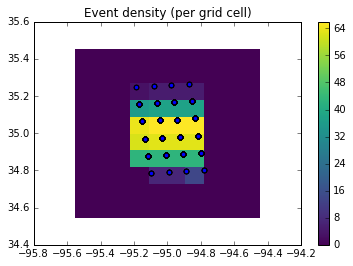

In [7]:
# from lmatools.grid.make_grids import centers_to_edges
from lmatools.vis.multiples_nc import centers_to_edges
import matplotlib
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
grid_filename = tmpdir.name+'/2017/Apr/26/GLM_20170426_123000_60_1src_0.1095deg-dx_source.nc'
extent_grid = xarray.open_dataset(grid_filename)
lats, lons = extent_grid.latitude.data, extent_grid.longitude.data
counts = extent_grid.lma_source.data[0,:,:]
# print(lats.shape, lons.shape, counts.shape)
plt.pcolormesh(centers_to_edges(lons), centers_to_edges(lats), counts.T, cmap='viridis')
plt.colorbar()
plt.scatter(glm.dataset.event_lon.data, glm.dataset.event_lat.data)
plt.title('Event density (per grid cell)')
# flash_grid.flash_extent.plot()

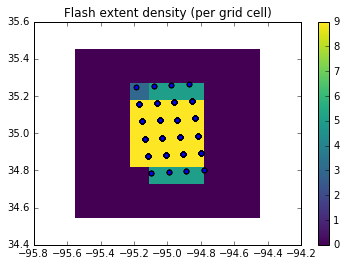

In [8]:
grid_filename = tmpdir.name+'/2017/Apr/26/GLM_20170426_123000_60_1src_0.1095deg-dx_flash_extent.nc'
extent_grid = xarray.open_dataset(grid_filename)
lats, lons = extent_grid.latitude.data, extent_grid.longitude.data
counts = extent_grid.flash_extent.data[0,:,:]
# print(lats.shape, lons.shape, counts.shape)
plt.pcolormesh(centers_to_edges(lons), centers_to_edges(lats), counts.T, cmap='viridis')
plt.colorbar()
plt.scatter(glm.dataset.event_lon.data, glm.dataset.event_lat.data)
plt.title('Flash extent density (per grid cell)')
# flash_grid.flash_extent.plot()

In [9]:
tmpdir.cleanup()